# Base model testing

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import cv2
from keras.models import load_model
from keras.preprocessing import image
import os

In [2]:
from keras.models import model_from_json
# load json and create model
json_file = open('basemodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("weights.best.hdf5")
print("Loaded model from disk")

Loaded model from disk


In [3]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
re_lu (ReLU)                 (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 75, 75, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0

In [9]:
test = "test/"

In [10]:
for i in os.listdir(test):
    print(i)
    

C177P138NThinF_IMG_20151201_142942_cell_170 - Copy.png
C180P141NThinF_IMG_20151201_164714_cell_164 - Copy.png
C188P149ThinF_IMG_20151203_134319_cell_188 - Copy.png
C189P150ThinF_IMG_20151203_142224_cell_81.png
C1_thinF_IMG_20150604_104722_cell_115 - Copy.png
C1_thinF_IMG_20150604_104722_cell_123 - Copy.png
C1_thinF_IMG_20150604_104722_cell_216 - Copy.png
C1_thinF_IMG_20150604_104722_cell_242 - Copy.png
C1_thinF_IMG_20150604_104722_cell_248 - Copy.png
C1_thinF_IMG_20150604_104722_cell_73 - Copy.png
C1_thinF_IMG_20150604_104722_cell_73.png
C1_thinF_IMG_20150604_104722_cell_79 - Copy.png
C1_thinF_IMG_20150604_104722_cell_81 - Copy.png
C33P1thinF_IMG_20150619_115808a_cell_206 - Copy.png
C33P1thinF_IMG_20150619_120742a_cell_210 - Copy.png
C33P1thinF_IMG_20150619_120804a_cell_224 - Copy.png
C37BP2_thinF_IMG_20150620_131423a_cell_92 - Copy.png
C37BP2_thinF_IMG_20150620_131423a_cell_94 - Copy.png


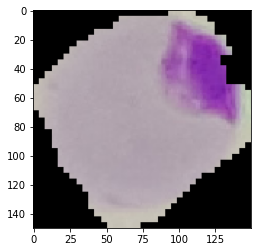

infected


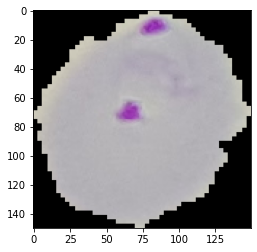

infected


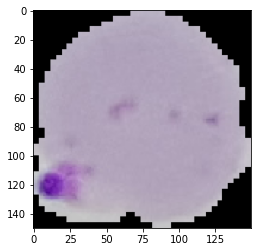

infected


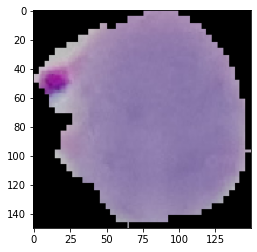

infected


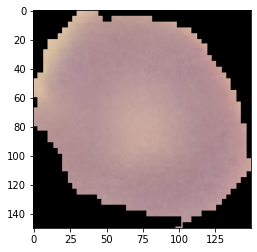

healthy


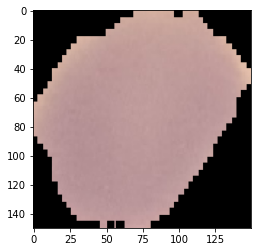

healthy


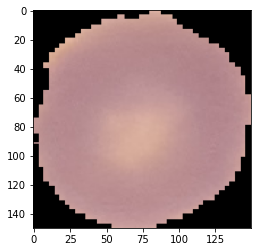

healthy


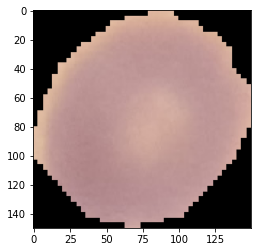

healthy


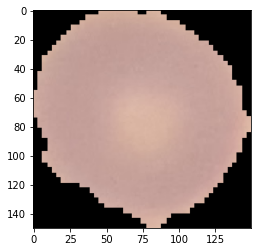

healthy


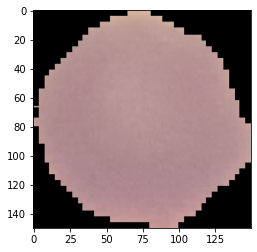

healthy


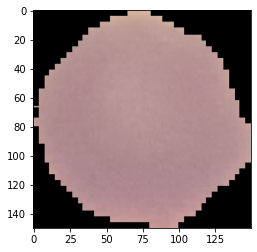

healthy


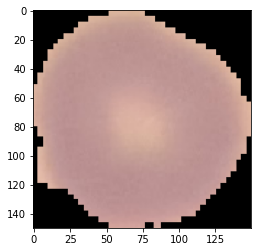

healthy


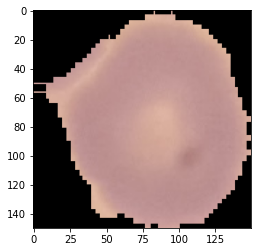

healthy


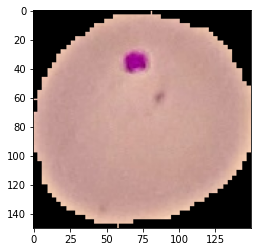

infected


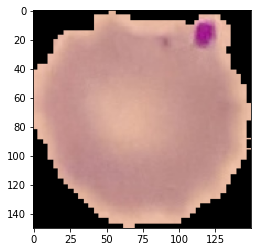

infected


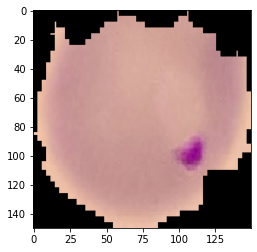

infected


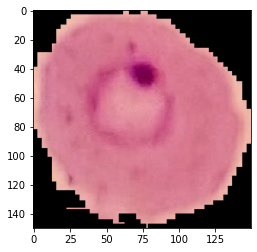

infected


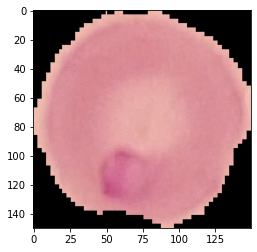

infected


In [15]:
for i in os.listdir(test):
    img = image.load_img(test+"//"+i,target_size=(150, 150))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    val = loaded_model.predict(images)   #{'healthy': 0, 'infected': 1}
    if val == 0:
        print("healthy")
    else:
        print("infected")
    

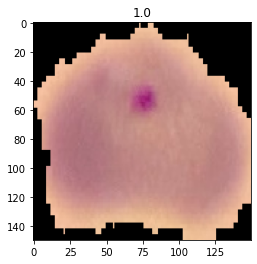

In [5]:
image_path="infected.png"
img = image.load_img(image_path, target_size=(150, 150))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict(img)
plt.title((result[0][0]))
plt.show()

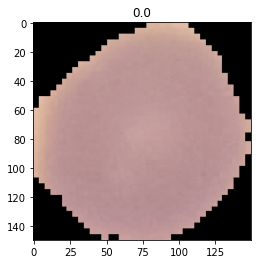

In [6]:
image_path="healthy.png"
img = image.load_img(image_path, target_size=(150, 150))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict(img)
plt.title((result[0][0]))
plt.show()